In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import glob, os
import re 

import PIL
from PIL import Image

In [3]:
# Use Pillow library to convert an input jpeg to a 8 bit grey scale image array for processing.
def jpeg_to_8_bit_greyscale(path, maxsize):
    img = Image.open(path).convert('L') #convert image to 8 bit greyscale
    # Make aspect ratio as 1:1, by applying image crop
    # Please note, croping works for this data set, but in general one
    # needs to locate the subject and then crop or scale accordingly.
    WIDTH, HEIGHT = img.size
    if WIDTH != HEIGHT:
        m_min_d = min(WIDTH, HEIGHT)
        img = img.crop((0, 0, m_min_d, m_min_d))
     # Scale the image to the requested maxsize by Anti-alias sampling.
    img.thumbnail(maxsize, PIL.Image.ANTIALIAS)
    return np.asarray(img)

In [4]:
# LOAD THE DATA SETS FROM IMAGES INTO NUMPY ARRAYS
def load_image_dataset(path_dir, maxsize):
    images = []
    labels = []
    os.chdir(path_dir)
    for file in glob.glob("*.jpg"):
        img = jpeg_to_8_bit_greyscale(file, maxsize)
        if re.match('chihuahua.*', file):
            images.append(img)
            labels.append(0)
        elif re.match('muffin.*', file):
            images.append(img)
            labels.append(1)
    return (np.asarray(images), np.asarray(labels))

In [5]:
maxsize = 100, 100

In [9]:
# load the data
(train_images, train_labels) = load_image_dataset('/Users/macbook/Documents/chihuahua-muffin/image-recognition-tensorflow/chihuahua-muffin', maxsize)
(test_images, test_labels) = load_image_dataset('/Users/macbook/Documents/chihuahua-muffin/image-recognition-tensorflow/chihuahua-muffin/test_set', maxsize)

/var/folders/2y/tbg6y_k178s08x5pqx2zjg_00000gn/T/ipykernel_92389/2692765754.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img.thumbnail(maxsize, PIL.Image.ANTIALIAS)


In [10]:
# defining class name
class_names = ['chihuahua', 'muffin']

In [11]:
# explore data
train_images.shape

(26, 100, 100)

In [12]:
print(train_labels)

[0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0]


In [13]:
test_images.shape

(14, 100, 100)

In [19]:
#visualizing the dataset
def display_images(images, labels):
    plt.figure(figsize=(10, 10))
    grid_size = min(25, len(images))
    for i in range(grid_size):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])

<function matplotlib.pyplot.show(close=None, block=None)>

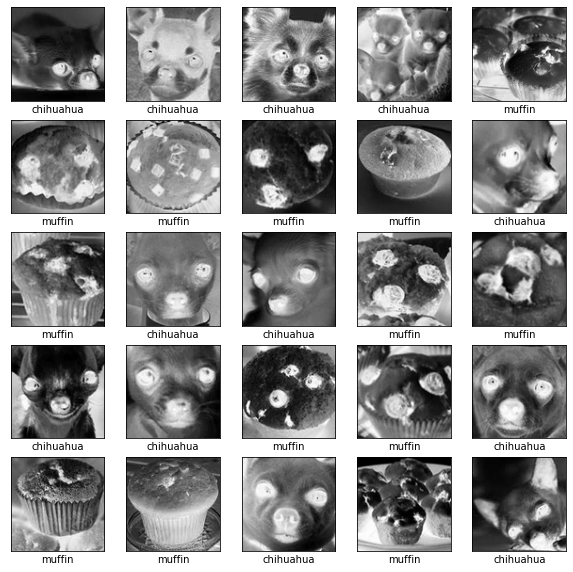

In [20]:
# execute the function to show the data
display_images(train_images, train_labels)
plt.show

In [21]:
# DATA PREPROCESSING
# scaling the images between 0 and 1
train_images = train_images/255.0
test_images = test_images/255.0

In [22]:
# Build the model
# setting up layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(100, 100)),
        keras.layers.Dense(128, activation=tf.nn.sigmoid),
        keras.layers.Dense(16, activation=tf.nn.sigmoid),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

2022-10-04 09:46:27.056473: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
# COMPILE THE MODEL
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-5, momentum=0.7, nesterov=True)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/Users/macbook/opt/anaconda3/envs/dlearning/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [24]:
# train model
model.fit(train_images, train_labels, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 917ms/step - loss: 0.7006 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6911 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6844 - accuracy: 0.5769
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6799 - accuracy: 0.6923
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6762 - accuracy: 0.5769
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6723 - accuracy: 0.5769
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 0.6681 - accuracy: 0.6923
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6637 - accuracy: 0.8077
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6593 - accuracy: 0.8077
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6550 - accuracy: 0.8462
Epoch 11/100
1/1 [====

In [25]:
# evaluate accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 300ms/step - loss: 0.5420 - accuracy: 0.7857
Test accuracy: 0.7857142686843872


In [26]:
# make predictions
predictions = model.predict(test_images)

In [27]:
print(predictions)

[[0.6696992  0.3303008 ]
 [0.5575033  0.4424967 ]
 [0.5715095  0.42849046]
 [0.72038084 0.27961916]
 [0.65177816 0.3482218 ]
 [0.48869434 0.5113057 ]
 [0.7346062  0.26539373]
 [0.4747376  0.5252624 ]
 [0.6274661  0.3725339 ]
 [0.48700348 0.51299655]
 [0.56335515 0.43664488]
 [0.3553488  0.64465123]
 [0.19938539 0.80061466]
 [0.37765914 0.62234086]]


<function matplotlib.pyplot.show(close=None, block=None)>

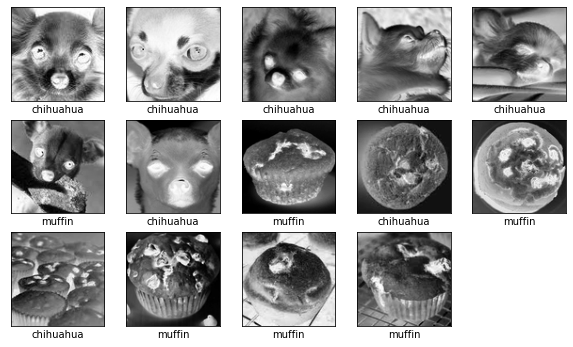

In [28]:
display_images(test_images, np.argmax(predictions, axis=1))
plt.show